In [1]:
!pip install -U wbdata

^C


In [2]:
import wbdata 
wbdata.get_source()   

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  24  Poverty and Equity
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclus

In [17]:
wbdata.get_source(12)
wbdata.get_country()
# wbdata.get_indicator(source=12)

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

### Finding indicators with less null values

In [18]:
indicators= {'SE.SEC.PRIV.ZS':'School enrollment, secondary, private (% of total secondary)'}
df = wbdata.get_dataframe(indicators, country='all', convert_date=False)
df.isnull().sum()

School enrollment, secondary, private (% of total secondary)    12803
dtype: int64

In [19]:
indic1 = {'SE.SEC.TCHR':'Secondary education, teachers'}
df = wbdata.get_dataframe(indic1, country='all', convert_date=False)
df.isnull().sum()

Secondary education, teachers    9437
dtype: int64

In [20]:
indic2= {'SE.SEC.ENRL.TC.ZS':'Pupil-teacher ratio, secondary'}
df = wbdata.get_dataframe(indic2, country='all', convert_date=False)
df.isnull().sum()

Pupil-teacher ratio, secondary    9745
dtype: int64

In [21]:
indic3 = {'SE.SEC.ENRL.GC':'Secondary education, general pupils'}
df = wbdata.get_dataframe(indic3, country='all', convert_date=False)
df.isnull().sum()

Secondary education, general pupils    6724
dtype: int64

In [22]:
indic4 = {'IT.NET.SECR.P6':'Secure Internet servers (per 1 million people)'}
df = wbdata.get_dataframe(indic4, country='all', convert_date=False)
df.isnull().sum()

Secure Internet servers (per 1 million people)    13365
dtype: int64

In [23]:
indic5 = {'SE.XPD.TOTL.GB.ZS':'Government expenditure on education, total (% of government expenditure)'}
df = wbdata.get_dataframe(indic5, country='all', convert_date=False)
df.isnull().sum()

Government expenditure on education, total (% of government expenditure)    12716
dtype: int64

In [24]:
indic6 = {'SE.XPD.CSEC.ZS':'Expenditure on secondary education (% of government expenditure on education)'}
df = wbdata.get_dataframe(indic6, country='all', convert_date=False)
df.isnull().sum()

Expenditure on secondary education (% of government expenditure on education)    14546
dtype: int64

## The indicators with less null values we are going to use are SE.SEC.ENRL.GC':'Secondary education, general pupils and SE.SEC.TCHR':'Secondary education, teachers

In [25]:
indicators = {'SE.SEC.TCHR':'Secondary education, teachers','SE.SEC.ENRL.GC':'Secondary education, general pupils'}

This Indicator shows the number of students enrolled in secondary education

In [26]:
students = {'SE.SEC.ENRL.GC':'Secondary education, general pupils'}#Secondary general pupils are the number of secondary students enrolled in general education programs, including teacher training.; ; UNESCO Institute for Statistics (http://uis.unesco.org/).

This indicator shows how many teachers they have in secondary school

In [27]:
teacher = {'SE.SEC.TCHR':'Secondary education, teachers'} 

In [28]:
#this list contains the non countries names in the world banck data 
countries=['World', 'IDA & IBRD total', 'Low & middle income', 'Middle income',
       'IBRD only', 'Early-demographic dividend', 'Lower middle income',
       'Upper middle income', 'Late-demographic dividend',
       'East Asia & Pacific', 'South Asia', 'South Asia (IDA & IBRD)',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'OECD members', 'China',
       'IDA total', 'High income', 'Post-demographic dividend',
       'Europe & Central Asia', 'Latin America & Caribbean',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Latin America & Caribbean (excluding high income)', 'IDA only',
       'Least developed countries: UN classification',
        'Middle East & North Africa',
       'European Union', 'Europe & Central Asia (IDA & IBRD countries)',
       'Heavily indebted poor countries (HIPC)',
       'Europe & Central Asia (excluding high income)',
       'Middle East & North Africa (excluding high income)', 'IDA blend',
       'Arab World', 'Middle East & North Africa (IDA & IBRD countries)',
       'Other small states','Euro area','Small states','Caribbean small states']
len(countries)

38

In [29]:
wbdata.get_data
import pandas as pd
df = wbdata.get_dataframe(teacher, country='all',convert_date=False )
#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
# 
df1 = df.dropna()
df2 = df1.unstack(level=0).transpose()
df2.drop(df2.iloc[:,10:50], inplace = True,axis = 1)
df3 = df2.dropna()
# df3
df3.reset_index(inplace=True)
df3.set_index('country',inplace=True)
df3.drop(lis,axis=0,inplace=True)
# print(df3.shape)
# print(df3.index[:50])
df_country = pd.DataFrame(list(df3.index), columns=['teacher indicator'])
df_country
# df_country.insert(1, "df3", list(df3.index), True)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,teacher indicator
0,Central Europe and the Baltics
1,Albania
2,Burkina Faso
3,Burundi
4,Chad
5,Cuba
6,Ghana
7,"Hong Kong SAR, China"
8,Jamaica
9,Kyrgyz Republic


## Countries that have a highcustomer potential for our services

In [16]:
wbdata.get_data
import pandas as pd
df = wbdata.get_dataframe(students, country='all',convert_date=False )
#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
# 
df1 = df.dropna()
df2 = df1.unstack(level=0).transpose()
df2.drop(df2.iloc[:,10:50], inplace = True,axis = 1)
df3 = df2.dropna()
# df3
df3.reset_index(inplace=True)
df3.set_index('country',inplace=True)
df3.drop(lis,axis=0,inplace=True)
# print(df3.shape)
# print(df3.index[:19])
df_country.insert(1, "Pupil indicator", list(df3.index[:19]), True)
df_country

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,teacher indicator,Pupil indicator
0,Central Europe and the Baltics,Central Europe and the Baltics
1,Albania,Fragile and conflict affected situations
2,Burkina Faso,Low income
3,Burundi,North America
4,Chad,Pacific island small states
5,Cuba,Pre-demographic dividend
6,Ghana,Sub-Saharan Africa
7,"Hong Kong SAR, China",Sub-Saharan Africa (excluding high income)
8,Jamaica,Sub-Saharan Africa (IDA & IBRD countries)
9,Kyrgyz Republic,Afghanistan


## Evolution of this customer potential?

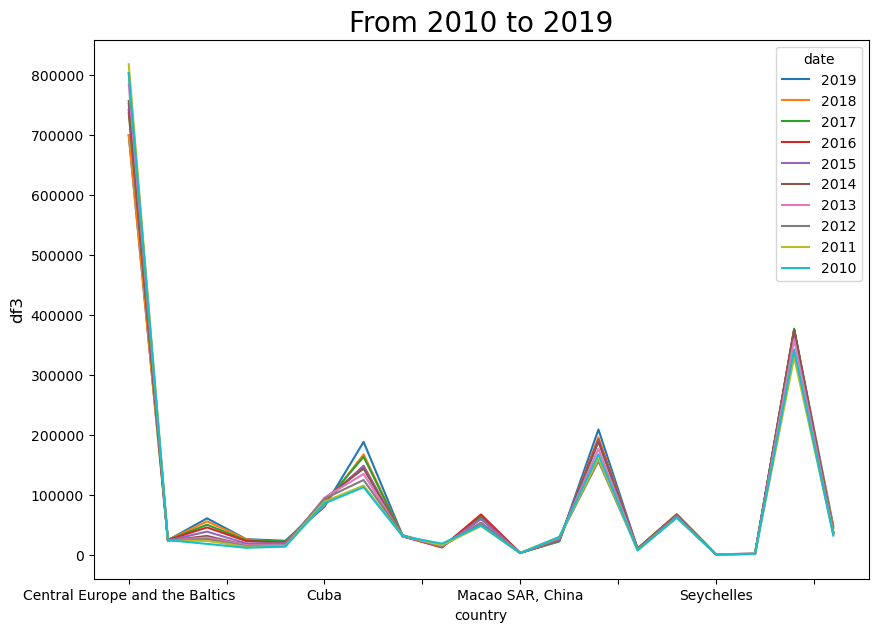

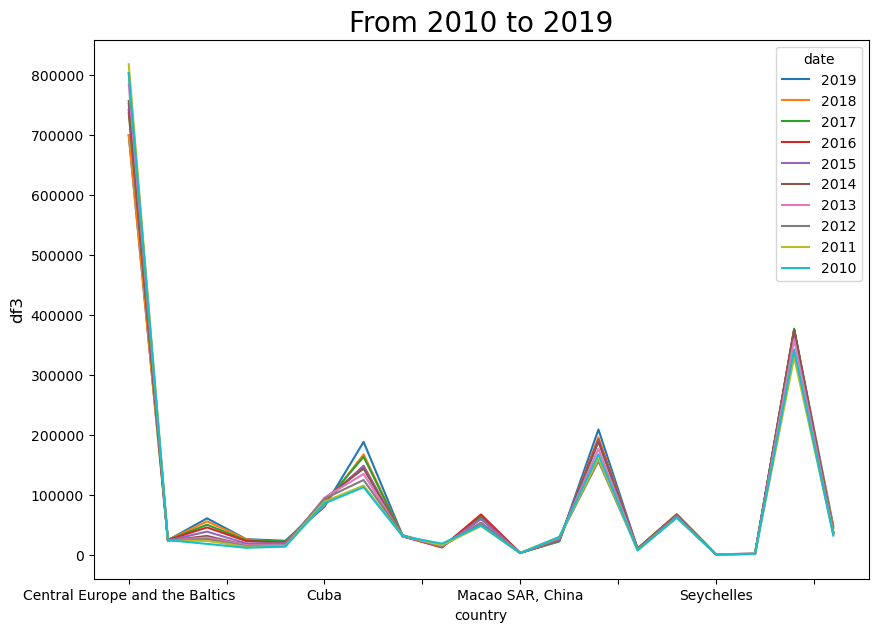

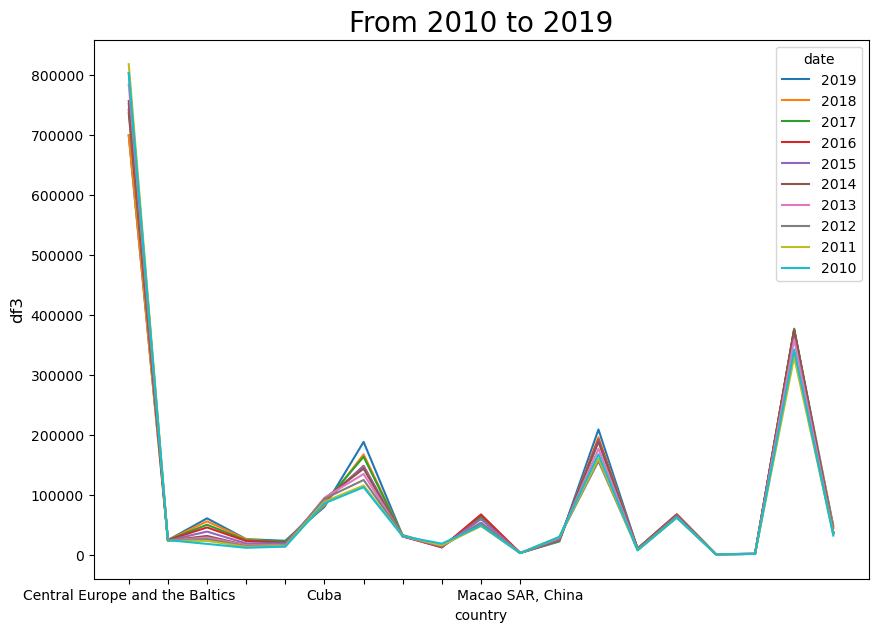

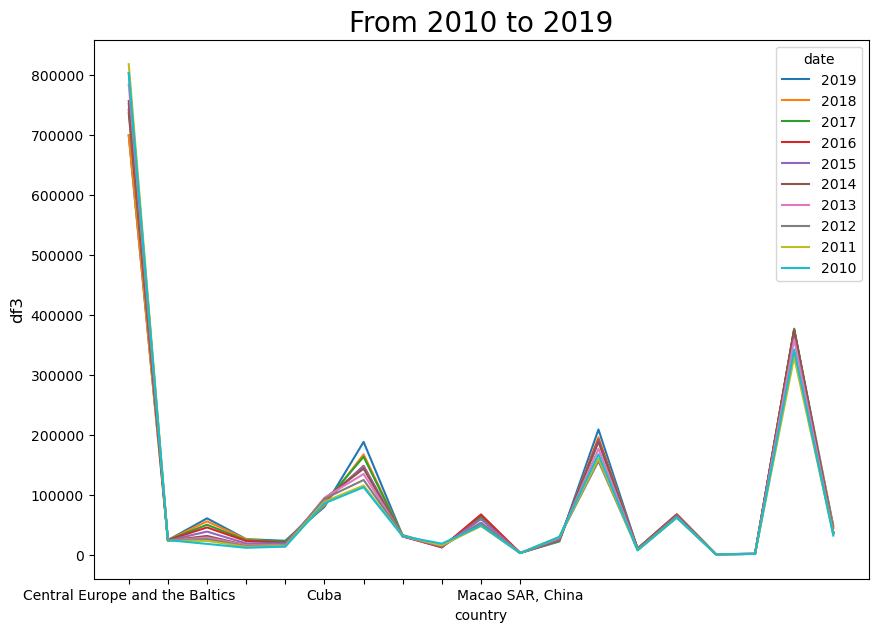

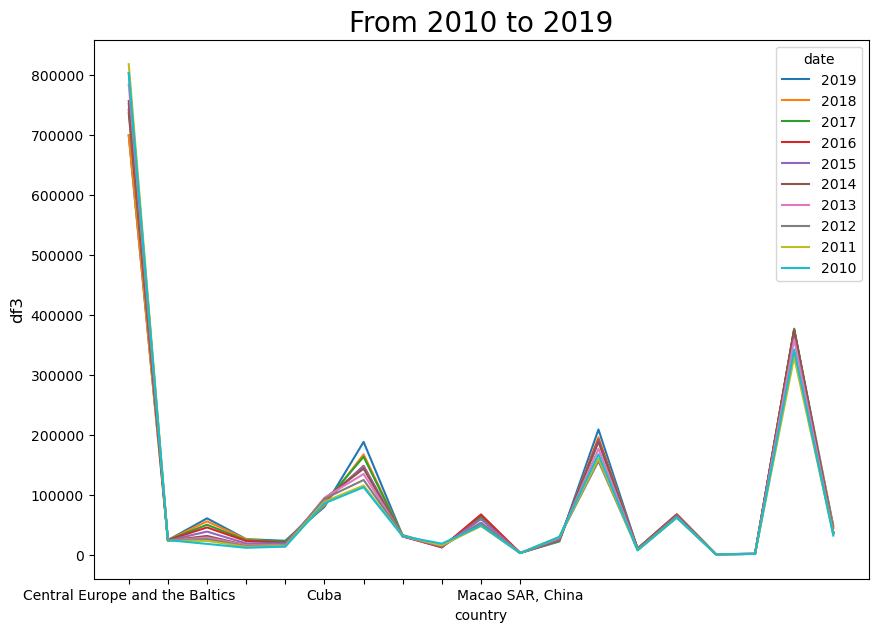

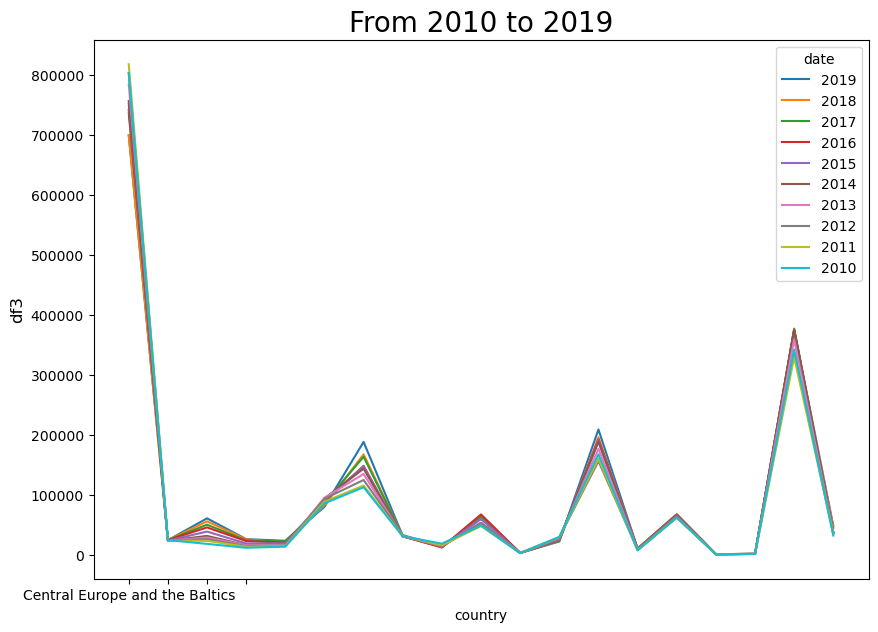

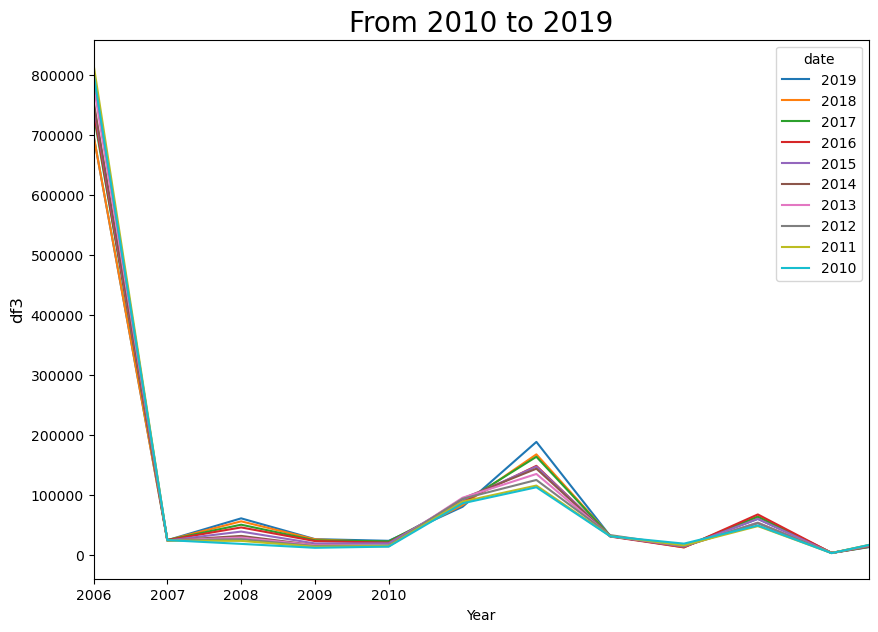

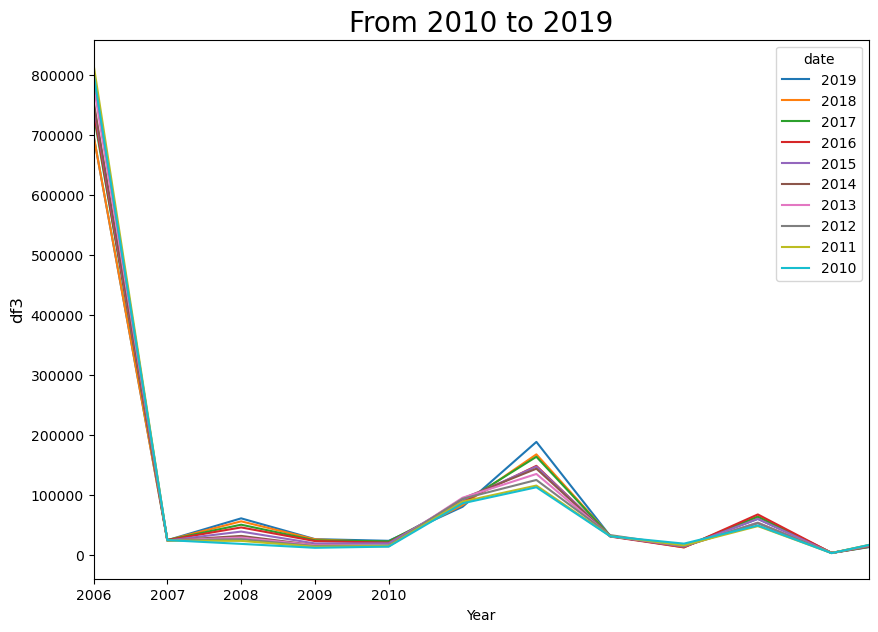

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
ax = df3.plot(figsize=(10,7))
ax.set_ylabel('df3', fontsize=12)
ax.set_title('From 2010 to 2019',alpha=2.0, fontsize=20)
plt.setp(ax,xticks=np.arange(0,5,step=1), xticklabels=['2006','2007', '2008', '2009','2010'],xlim=[0,10.5], xlabel='Year')
plt.show()

  - Central Europe and the Baltics the evolution curve is not growing up,
  - Cuba the evolution curve is going up a little
  - China the evolution curve is going down 
  - Seychelles the evolution curve is going up


## In which countries should one set up first?

Seychelles is the best country to set up first and cuba comes next